In [1]:
import glob
import numpy as np
import pandas as pd
import plotly as py
import cufflinks as cf
%matplotlib inline

In [2]:
train_A_over_logs = "../eval/20190329_RetinaNet_train_A_over_class_eval/13"
train_B_over_logs = "../eval/20190329_RetinaNet_train_B_over_class_eval/13"
train_C_over_logs = "../eval/20190329_RetinaNet_train_C_over_class_eval/13"
train_A_over_ganaug_025_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_025_class_eval/13"
train_A_over_ganaug_050_logs = "../eval/20190329_RetinaNet_train_A_over_ganaug_050_class_eval/13"
pattern = "/**/*test_night*.txt"

num_last_iteration = 240000

train_A_over_iteration = 105000 # None = best
train_B_over_iteration = 97500 # None = best
train_C_over_iteration = 65000 # None = best
train_A_over_ganaug_025_iteration = 42500 # None = best
train_A_over_ganaug_050_iteration = 102500 # None = best

In [3]:
train_A_over_logs = glob.glob(train_A_over_logs + pattern, recursive = True)
train_B_over_logs = glob.glob(train_B_over_logs + pattern, recursive = True)
train_C_over_logs = glob.glob(train_C_over_logs + pattern, recursive = True)

train_A_over_ganaug_025_logs = glob.glob(train_A_over_ganaug_025_logs + pattern, recursive = True)
train_A_over_ganaug_050_logs = glob.glob(train_A_over_ganaug_050_logs + pattern, recursive = True)

In [4]:
def logs2df(logs, num_last_iteration, iteration = None):
    df_iterations = pd.DataFrame()
    last_iteration = -1
    for log in logs:
        df = pd.read_csv(log)
        df = df.drop(columns = ["Unnamed: 12"])
        df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
        df_iterations = pd.concat([df_iterations, df], axis = 0)
        df_iterations = df_iterations.reset_index(drop = True)
        last_iteration = df["Iteration"]
    df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)
    if iteration is not None:
        df_iterations = df_iterations.loc[df_iterations.Iteration == iteration].drop_duplicates(["Iteration"], keep = "last").reset_index(drop = True)
    df_iterations = df_iterations.set_index("Iteration")
    return df_iterations

## Last (or other specified) iterations ##

### --> All metrics are evaluated on the selected iteration <-- ###

### train_A_over ###

In [5]:
df_train_A_over = logs2df(train_A_over_logs, num_last_iteration, train_A_over_iteration)
df_train_A_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
105000,0.248707,0.523496,0.206713,0.189754,0.420465,0.486269,0.11798,0.357773,0.391025,0.344821,0.538207,0.575


In [6]:
df_train_A_over_best_iter_per_metric = df_train_A_over.idxmax().to_frame().T
df_train_A_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000,105000


In [7]:
df_train_A_over_best_val_per_metric = df_train_A_over.max().to_frame().T
df_train_A_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.248707,0.523496,0.206713,0.189754,0.420465,0.486269,0.11798,0.357773,0.391025,0.344821,0.538207,0.575


### train_B_over ###

In [8]:
df_train_B_over = logs2df(train_B_over_logs, num_last_iteration, train_B_over_iteration)
df_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
97500,0.280619,0.589325,0.230545,0.217563,0.460278,0.529689,0.124247,0.391086,0.421722,0.370956,0.586621,0.582692


In [9]:
df_train_B_over_best_iter_per_metric = df_train_B_over.idxmax().to_frame().T
df_train_B_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,97500,97500,97500,97500,97500,97500,97500,97500,97500,97500,97500,97500


In [10]:
df_train_B_over_best_val_per_metric = df_train_B_over.max().to_frame().T
df_train_B_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.280619,0.589325,0.230545,0.217563,0.460278,0.529689,0.124247,0.391086,0.421722,0.370956,0.586621,0.582692


### train_C_over ###

In [11]:
df_train_C_over = logs2df(train_C_over_logs, num_last_iteration, train_C_over_iteration)
df_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
65000,0.287744,0.604323,0.237706,0.217638,0.483425,0.534484,0.126955,0.395071,0.422026,0.36506,0.605931,0.613462


In [12]:
df_train_C_over_best_iter_per_metric = df_train_C_over.idxmax().to_frame().T
df_train_C_over_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000,65000


In [13]:
df_train_C_over_best_val_per_metric = df_train_C_over.max().to_frame().T
df_train_C_over_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.287744,0.604323,0.237706,0.217638,0.483425,0.534484,0.126955,0.395071,0.422026,0.36506,0.605931,0.613462


### train_A_over_ganaug_025 ###

In [14]:
df_train_A_over_ganaug_025 = logs2df(train_A_over_ganaug_025_logs, num_last_iteration, train_A_over_ganaug_025_iteration)
df_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
42500,0.243424,0.516775,0.198039,0.181033,0.432667,0.503367,0.116063,0.349103,0.383085,0.317649,0.591448,0.642308


In [15]:
df_train_A_over_ganaug_025_best_iter_per_metric = df_train_A_over_ganaug_025.idxmax().to_frame().T
df_train_A_over_ganaug_025_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,42500,42500,42500,42500,42500,42500,42500,42500,42500,42500,42500,42500


In [16]:
df_train_A_over_ganaug_025_best_val_per_metric = df_train_A_over_ganaug_025.max().to_frame().T
df_train_A_over_ganaug_025_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.243424,0.516775,0.198039,0.181033,0.432667,0.503367,0.116063,0.349103,0.383085,0.317649,0.591448,0.642308


### train_A_over_ganaug_050 ###

In [17]:
df_train_A_over_ganaug_050 = logs2df(train_A_over_ganaug_050_logs, num_last_iteration, train_A_over_ganaug_050_iteration)
df_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Iteration,,,,,,,,,,,,
102500,0.242826,0.518862,0.193915,0.185856,0.411609,0.521258,0.115911,0.347581,0.380529,0.328765,0.54469,0.596154


In [18]:
df_train_A_over_ganaug_050_best_iter_per_metric = df_train_A_over_ganaug_050.idxmax().to_frame().T
df_train_A_over_ganaug_050_best_iter_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,102500,102500,102500,102500,102500,102500,102500,102500,102500,102500,102500,102500


In [19]:
df_train_A_over_ganaug_050_best_val_per_metric = df_train_A_over_ganaug_050.max().to_frame().T
df_train_A_over_ganaug_050_best_val_per_metric.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
0,0.242826,0.518862,0.193915,0.185856,0.411609,0.521258,0.115911,0.347581,0.380529,0.328765,0.54469,0.596154


## Improvements ##

### train_A_over --> train_B_over ###

In [20]:
df_train_A_over_TO_train_B_over = df_train_B_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_B_over["Comparison"] = "A to B"
df_train_A_over_TO_train_B_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.031911,0.065829,0.023832,0.02781,0.039813,0.04342,0.006267,0.033313,0.030697,0.026135,0.048414,0.007692,A to B


### train_A_over --> train_C_over ###

In [21]:
df_train_A_over_TO_train_C_over = df_train_C_over_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_C_over["Comparison"] = "A to C"
df_train_A_over_TO_train_C_over.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,0.039037,0.080827,0.030993,0.027884,0.06296,0.048216,0.008975,0.037298,0.031001,0.020239,0.067724,0.038462,A to C


### train_A_over --> train_A_over_ganaug_025 ###

In [22]:
df_train_A_over_TO_train_A_over_ganaug_025 = df_train_A_over_ganaug_025_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_025["Comparison"] = "A to A25"
df_train_A_over_TO_train_A_over_ganaug_025.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.005283,-0.006721,-0.008674,-0.00872,0.012202,0.017099,-0.001917,-0.008671,-0.00794,-0.027171,0.053241,0.067308,A to A25


### train_A_over --> train_A_over_ganaug_050 ###

In [23]:
df_train_A_over_TO_train_A_over_ganaug_050 = df_train_A_over_ganaug_050_best_val_per_metric - df_train_A_over_best_val_per_metric
df_train_A_over_TO_train_A_over_ganaug_050["Comparison"] = "A to A50"
df_train_A_over_TO_train_A_over_ganaug_050.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Comparison
0,-0.005881,-0.004633,-0.012798,-0.003897,-0.008856,0.03499,-0.002069,-0.010192,-0.010496,-0.016056,0.006483,0.021154,A to A50


## Combine ##

In [24]:
df_combined = pd.concat([df_train_A_over_TO_train_B_over, df_train_A_over_TO_train_C_over, df_train_A_over_TO_train_A_over_ganaug_025, df_train_A_over_TO_train_A_over_ganaug_050], axis = 0)

In [25]:
df_combined = df_combined.set_index("Comparison")
df_combined.head(1)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl
Comparison,,,,,,,,,,,,
A to B,0.031911,0.065829,0.023832,0.02781,0.039813,0.04342,0.006267,0.033313,0.030697,0.026135,0.048414,0.007692


Text(0, 0.5, 'Absolute change in score')

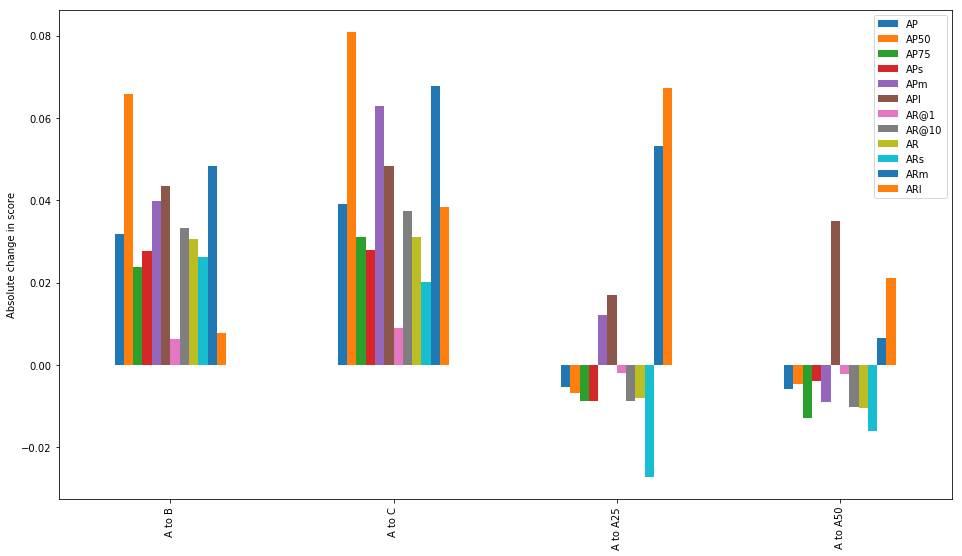

In [26]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score")

In [27]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)

In [28]:
df_combined = df_combined * 100

Text(0, 0.5, 'Absolute change in score (%)')

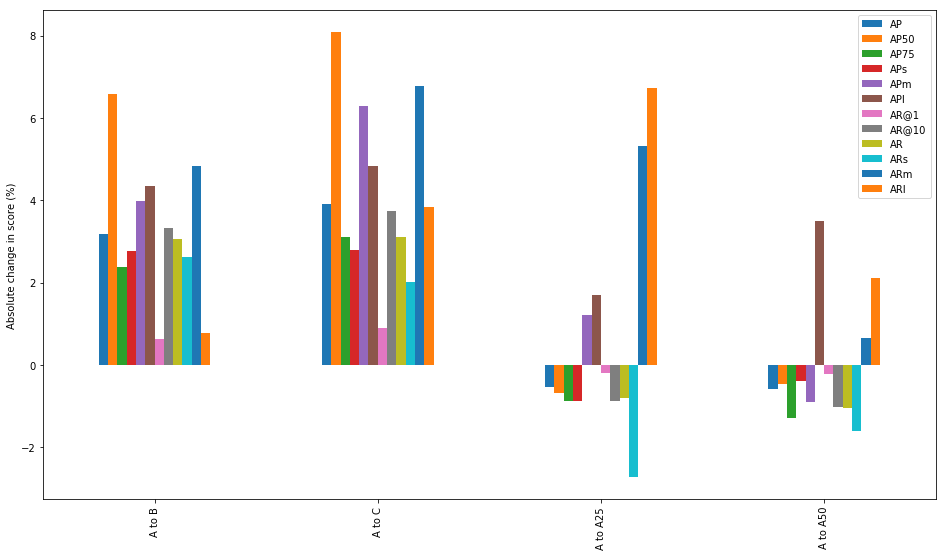

In [29]:
ax = df_combined.plot(kind = "bar", figsize = (16, 9))
ax.set_xlabel("")
ax.set_ylabel("Absolute change in score (%)")

In [30]:
layout = {
    "title": "Impact of GAN-based augmentation",
    "yaxis": {
        "title": "Absolute change in score (%)"
    },
    "width": 960,
    "height": 540
}
fig = df_combined.iplot(kind = "bar", y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)